# Hollenbach-ova metoda

Določevanje upora ladje s pomočjo Hollenbach-ove empirične metode. Metoda temelji na statistični obdelavi podatkov različnih ladij.


In [1]:
import math as mat
import numpy as np
import sympy as sym

import matplotlib as mpl
import matplotlib.pyplot as plt

# set LaTeX fonts
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
sym.init_printing()

## Pomožne funkcije

Pomožna funkcija nam določi rezidualni del upora s pomočjo empirične formulacije po Hollenbachu.

In [2]:
# Funkcija za srednji upora ladje:
# - en propeler
# - design draft

def Lfroude(Lpp,Los):
    
    if Los/Lpp < 1:
        Lfn = Los;
    elif Los/Lpp >= 1.0 and Los/Lpp <= 1.1:
        Lfn = Lpp + 2/3*(Los - Lpp);
    else:
        Lfn = 1.0667*Lpp;
    
    return Lfn

def Cr_Hollenbach(V,Lpp,Lwl,Los,B,Ta,Tf,Cb,Dp,Nrud,Nbrac,Nboss,Nthr):
# izračun residualnega upora po Hollenbachu

    # koeficienti za: MEAN resistance + Single SCREW + Design DRAFT
    a1 = -0.3382; a2 = 0.8086; a3 = -6.0258; a4 = -3.5632; a5 = 9.4405; a6 = 0.0146;
    a7 = 0.0; a8 = 0.0; a9 = 0.0; a10 = 0.0;
    
    b11 = -0.57424; b12 = 13.3893; b13 = 90.5960;
    b21 = 4.6614; b22 = -39.721; b23 = -351.483;
    b31 = -1.14215; b32 = -12.3296; b33 = 459.254;
    
    d1 = 0.854; d2 = -1.228; d3 = 0.497;
    e1 = 2.1701; e2 = -0.1602;
    f1 = 0.17; f2 = 0.20; f3 = 0.60;
    g1 = 0.642; g2 = -0.635; g3 = 0.150;
    h1 = 1.204;
    
    T = 0.5*(Ta + Tf);
    Fn = V/mat.sqrt(9.81*Lfroude(Lpp,Los));
    Fn_krit = d1 + d2*Cb + d3*Cb**2;
    c1 = Fn/Fn_krit;
    
    Cr_s = b11 + b12*Fn + b13*Fn**2 + Cb*(b21 + b22*Fn + b23*Fn**2) + Cb**2*(b31 + b32*Fn + b33*Fn**2);
    Cr_k = max(1.0, (Fn/Fn_krit)**c1);
    kL = e1*Lpp**e2;
    
    Cr = Cr_s * Cr_k * kL * (T/B)**a1 * (B/Lpp)**a2 * (Los/Lwl)**a3 * (Lwl/Lpp)**a4 * (1 + (Ta - Tf)/Lpp)**a5 * (Dp/Ta)**a6 * (1 + Nrud)**a7 * (1 * Nbrac)**a8 * (1 + Nboss)**a9 * (1 + Nthr)**a10;
    
    return Cr

## Navodila za Izračun upora plovila

Po metodi Hollenbach določimo perostali/residualni del upora modela s pomočjo empiričnega modela, ki ga je izdelal *Dr.Ing. Uwe Hollenbach, SDC Ship  Design & Consult GmbH, Germany* in objavil v reviji *“Estimating resistance and  propulsion for single-screw and twin-screw ships in the preliminary  design” 10th International conference on computer applications in shipbuilding, 7–11 June 1999*. Metoda je namenjena **zgolj za deplasmanska plovila** in ima omejitve podane v tabeli

<img src="figs/hollenbach_table.png" alt="Table" width="600" />

Ena pomembnih osnov Hollenbach-ove metode je določitev dolžin ladje

<img src="figs/hollenbach_length.png" alt="Length" width="600" />

Pomembna je dolžina $L_{OS}$, ki je različna za polno ladjo in za ladjo v balastni vožnji. Iz dolžin nato izhaja preračun Froude-jevega števila in so tako dolžine definirane kot

$$
L_{fn} =
\begin{cases}
L_{OS} & ,\text{for } \frac{L_{OS}}{L_{PP}} < 1.0\\
L_{PP} + \frac{2}{3} (L_{SO} - L_{PP}) & ,\text{for } 1.0 \leq  \frac{L_{OS}}{L_{PP}} \leq 1.1\\
1.0667 \: L_{PP} & ,\text{for } 1.1 <  \frac{L_{OS}}{L_{PP}}
\end{cases}
$$

Formula je implementirana v zgornj funkciji *Lfroude(Lpp,Los)*. Na podlagi te dolžine nato določimo Froudejevo število kot

$$
F_n = \frac{V}{\sqrt{g \: L_{fn}}}.
$$


### Postopek

Hollenbach definira koeficient **residualnega upora** kot

$$
C_R^\text{Hollenbach} = \frac{R_R}{\frac{1}{2}V_0^2 \: \frac{T \: B}{10}}
$$

**Celoten upor** ladje je tako potem določen kot

$$
R_{T}^s=R_R + \cdots
$$

kjer izrazimo **residualni upor** po Hollenbachu kot

$$
\begin{align}
C_R^{\text{Hollenbach}} & = C_R^{\text{Standard}} \: C_R^{\text{Fnkrit}} \: k_L \: \left( \frac{T}{B} \right)^{a_1} \: \left( \frac{B}{L_{PP}} \right)^{a_2} \: \left( \frac{L_{OS}}{L_{wl}} \right)^{a_3} \: \left( \frac{L_{wl}}{L_{PP}} \right)^{a_4} \: \left(1+ \frac{T_A - T_F}{L_{PP}} \right)^{a_5} \: \left( \frac{D_p}{T_A} \right)^{a_6} \: \left( 1 + N_{\text{Rud}} \right)^{a_7} \: \left( 1+ N_{\text{Brac}} \right)^{a_8}  \: \left( 1+ N_{\text{boss}} \right)^{a_9}  \: \left( 1+ N_{\text{Thr}} \right)^{a_{10}}, \\[2mm]
C_R^{\text{Standard}} & = b_{11} + b_{12} \: F_n + b_{13} \: F_n^2 + C_B \left( b_{21} + b_{22} \: F_n + b_{23} \: F_n^2 \right) + C_B^2 \left( b_{31} + b_{32} \: F_n + b_{33} \: F_n^2 \right)\\
C_R^{\text{Fnkrit}} & = \max \left[ 1.0, \left( \frac{F_n}{F_N^{\text{krit}}} \right)^{c_1} \right]\\
F_N^{\text{krit}} & = d_1 + d_2 \: C_B + d_3 \: C_B^2\\
k_L & = e_1 \: L_{PP}^{e_2}
\end{align}
$$

kjer imamo
- $T_A$: vgrez na krmenem perpendikularju (AP)
- $T_F$: vgrez na premčnem perpendikularju (FP)
- $D_p$: diameter propelerja
- $N_\text{Rud}$: število krmil
- $N_\text{Brac}$: število podpor na osi propelerja (0, 1, 2, 3, 4, ...)

<img src="figs/hollenbach_propeller.png" alt="Length" width="1000" />

- $N_\text{boss}$: število storžev ali strženov (boss/hub)

<img src="figs/hollenbach_propeller_definitions.png" alt="Length" width="500" />

Zgornje formule uporabimo na intervalu za Froudejevo število $F_n \in [F_n^{\min}, F_n^{\max}]$, kjer imamo meje določene z

$$
\begin{align}
F_n^{\min} & = \min [f_1, f_1 + f_2 \: (f_3 - C_B) ]\\
F_n^{\max} & = g_1 + g_2 \: C_B + g_3 \: C_B^2
\end{align}
$$

## Izračun

In [3]:
# Parametri modela in ladje

#Lpp - length between perpendiculars [m]:  
Lpp = 153.7;

#Lwl - length water line [m]:  
Lwl = 160.1;

#Los - length over surface [m]:  
Los = 165.4;

#B - breadth [m]:
B = 27.5;

#T - draught [m]:
Tf = 10.3; Ta = 10.3;
T = 0.5*(Tf + Ta);

#D - displacemnt [m3]:
D = 28342;

#S - wetted surface [m2]:
S = 5567.0;

#x_b Position centre of buoyancy forward of midship
xb = -0.571; # Lpp

#Cb - block coefficinet:
Cb = 0.650;

# Ratios
rlb =  5.582; # Lpp/B
rbt =  2.673; # B/T
rlt = 14.922; # L/T

#Caam - Air resistance:
Cair = 1.48E-03;

# Propeler diameter [m]
Dp = 6.1;

# Number of propellers
N_prop = 1;

# Number of rudders
N_rud = 1;

# Number of brackets
N_brac = 0;

# Number of bosses
N_boss = 1;

# Number of side thrusters
N_thr = 0;

# Kinematic viscosity [Pa s]:
mu = 0.001;

# Density [kg/m3]:
rho = 1025; 

In [4]:
# Izračun rezidualnega dela upora za različne hitrosti

V_m = np.array([0.4714, 0.6748, 0.8644, 1.1335, 1.3384, 1.5724, 1.7696, 1.8996, 2.0188, 2.1198, 2.2482, 2.4516])
Fn = V_m/mat.sqrt(9.81*Lfroude(Lpp, Los)/30.02)
V_s = Fn*mat.sqrt(9.81*Lpp)
dDim = V_m.shape[0]

Cr_h = np.zeros(dDim)
for i in range(dDim):
    Cr_h[i] = Cr_Hollenbach(V_s[i], Lpp, Lwl, Los, B, Tf, Ta, Cb, Dp, N_rud, N_brac, N_boss, N_thr);

Fn_min = min(0.17, 0.17+0.2*(0.6 - Cb))
Fn_max = 0.642 -0.635*Cb + 0.15*Cb**2;
print('Fn_min={:f}, Fn_max={:f}, Fn=[{:f},...,{:f}]\n'.format(Fn_min, Fn_max, Fn[0], Fn[-1]))

Fn_min=0.160000, Fn_max=0.292625, Fn=[0.064889,...,0.337469]



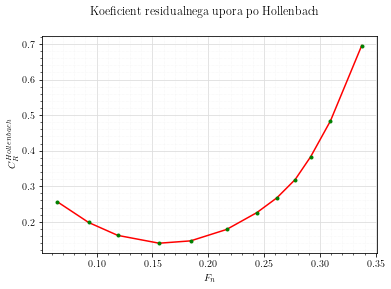

In [5]:
fig, ax = plt.subplots()
fig.suptitle('Koeficient residualnega upora po Hollenbach');

ax.plot(Fn, Cr_h, 'r-')
ax.plot(Fn, Cr_h, 'g.')
ax.set_xlabel('$F_n$')
ax.set_ylabel(r'$C_R^{Hollenbach}$')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
fig.savefig('hollenbach_resistance_residual.pdf')

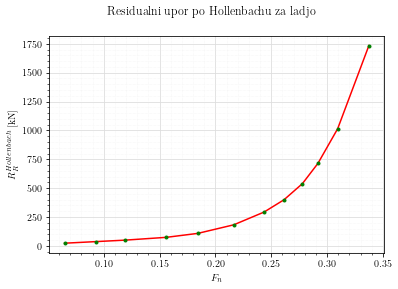

In [6]:
Rr_h = np.zeros(dDim);
for i in range(dDim):
    Rr_h[i] = 0.5*Cr_h[i]*rho*V_s[i]**2*T*B/10;

fig, ax = plt.subplots()
fig.suptitle('Residualni upor po Hollenbachu za ladjo');

ax.plot(Fn, Rr_h/1000, 'r-')
ax.plot(Fn, Rr_h/1000, 'g.')
ax.set_xlabel('$F_n$')
ax.set_ylabel(r'$R_R^{Hollenbach}$ [kN]')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
fig.savefig('hollenbach_resistance_residual_ship.pdf')

## Izračun celotnega upora ladje

Sedaj lahko določimo celoten upor ladje, kjer pa je potrebno upoštevati še podatek o hrapavosti površine. Popravek trenja zaradi hrapavosti površine določimo s  pomočjo Townsin (1990) formule, ki jo je privzel tudi ITTC

$$
\Delta C_F = 0.044 \left[ \left( \frac{H \: 10^{-6}}{L_{WL}}\right)^{1/3} - 10 \: R_n^{-1/3} \right] \: 1.25 \: 10^{-4}
$$

V primeru testov vzamemo za hrapavost vedno vrednost $H=150$. Celoten upor ladje je sedaj enak

$$
\begin{align}
C_k & = (1+k) (C_F + \Delta C_F)  + C_\text{Air}\\
R_T & = \frac{1}{2} C_k \: \rho \: V^2 \: S + R_R^\text{Hollenbach}
\end{align}
$$

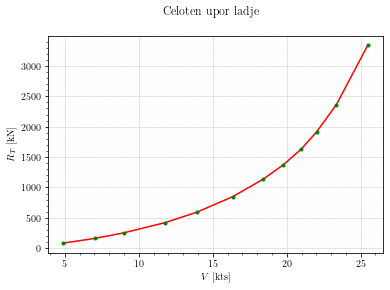

In [7]:
H = 150;
phi = Cb/Lpp*mat.sqrt(B*(Tf + Ta));
k = 0.6*phi + 145*phi**3.5;

Rt = np.zeros(dDim)
for i in range(dDim):
    Rn = V_s[i] * Lpp/(mu/rho);
    Cf = 0.075 / (mat.log10(Rn) - 2)**2
    DCf = 0.044 * ((H*1e-6/Lpp)**(1/3) - 10*Rn**(-1/3)) + 1.25e-4
    Ck = (1+k)*(Cf + DCf) + Cair;
    Rt[i] = (0.5*rho*V_s[i]**2*Ck*S+ Rr_h[i]);
    
fig, ax = plt.subplots()
fig.suptitle('Celoten upor ladje');

ax.plot(V_s*3600/1852, Rt/1000, 'r-')
ax.plot(V_s*3600/1852, Rt/1000, 'g.')
ax.set_xlabel('$V$ [kts]')
ax.set_ylabel(r'$R_T$ [kN]')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
fig.savefig('hollenbach_resistance_total_ship.pdf')

Iskanje optimalne hitrosti poteka na način, da poiščemo najnižji koeficient celotnega upora v intervalu načrtovane hitrosti ladje, ki jo določa ladjar

In [8]:
Fr_opt = 0.16;
Vx_opt = Fr_opt * mat.sqrt(9.81 * Lpp) * 3600/1852
Rx_opt = np.interp(Vx_opt, V_s*3600/1852, Rt/1000) # smo interpolirali tabelirane podatke
print('Rx = {:.2f} kN for speed Vx = {:.2f} kts (Fr={:.2f})'.format(Rx_opt, Vx_opt, Fr_opt))

Rx = 445.12 kN for speed Vx = 12.08 kts (Fr=0.16)


Efektivna moč, ki je potrebna za doseganje določene hitrosti

$$
P_{e} = R_T \: V_s
$$

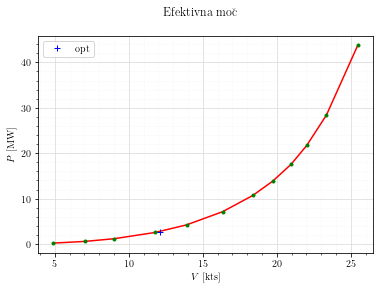

In [9]:
P_eff = np.multiply(Rt,V_s)
P_eff_opt = Rx_opt * Fr_opt * mat.sqrt(9.81 * Lpp)

fig, ax = plt.subplots()
fig.suptitle('Efektivna moč');

ax.plot(V_s*3600/1852, P_eff/1e6, 'r-')
ax.plot(V_s*3600/1852, P_eff/1e6, 'g.')
ax.plot(Vx_opt,P_eff_opt/1000, 'b+', label='opt')
ax.set_xlabel('$V$ [kts]')
ax.set_ylabel('$P$ [MW]')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
ax.legend()
fig.savefig('hollenbach_eff_power_ship.pdf')

In [10]:
print('P_eff = {:.2f} kW @ v = {:.2f} kts, Fr = {:.2f}, H = {:.1f}'.format(P_eff_opt, Fr_opt * mat.sqrt(9.81 * Lpp)*3.6/1.852, Fr_opt, H))

P_eff = 2765.47 kW @ v = 12.08 kts, Fr = 0.16, H = 150.0
